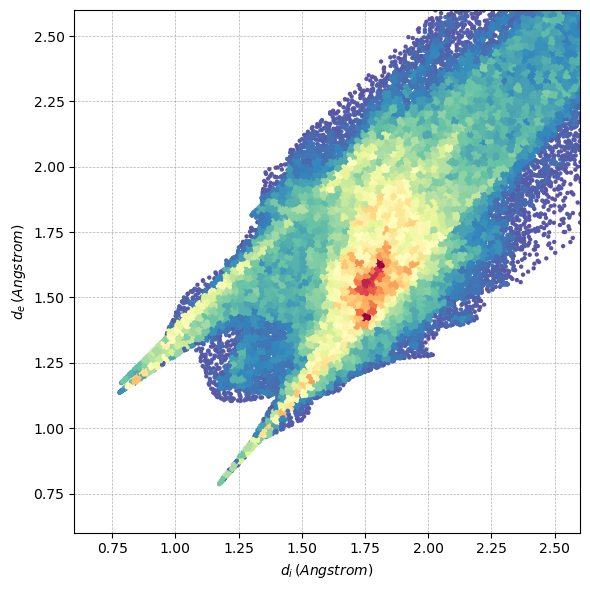

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd

df1 = pd.read_csv("iO_eH.txt", sep=r'\s+', header=None)
x1, y1 = df1[0], df1[1]
df2 = pd.read_csv("total.txt", sep=r'\s+', header=None)
x2, y2 = df2[0], df2[1]

# 计算点的密度
bins = 150  # 设定网格数
hist1, xedges1, yedges1 = np.histogram2d(x1, y1, bins=bins)
hist2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=bins)

# 获取每个点的密度
xidx1 = np.digitize(x1, xedges1) - 1
yidx1 = np.digitize(y1, yedges1) - 1
xidx2 = np.digitize(x2, xedges2) - 1
yidx2 = np.digitize(y2, yedges2) - 1

# 限制索引在有效范围内
xidx1 = np.clip(xidx1, 0, bins - 1)
yidx1 = np.clip(yidx1, 0, bins - 1)
xidx2 = np.clip(xidx2, 0, bins - 1)
yidx2 = np.clip(yidx2, 0, bins - 1)

# 获取每个点所在格子的密度值
density1 = hist1[xidx1, yidx1]
density2 = hist2[xidx2, yidx2]

# 绘制散点图，颜色根据密度调整
plt.figure(figsize=(6, 6))
plt.scatter(x2, y2, s=10, c=density2, cmap='Spectral_r', vmin=0, vmax=200, edgecolors='none', zorder=2)
#plt.scatter(x2, y2, s=10, color='lightgray', zorder=1)

plt.xlim(0.6, 2.6)
plt.ylim(0.6, 2.6)

plt.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6, zorder=0)

plt.xlabel(r"$d_{i}\,(Angstrom)$")
plt.ylabel(r"$d_{e}\,(Angstrom)$")

plt.tight_layout()
plt.savefig("total.png", dpi=600, bbox_inches="tight")
plt.show()